# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Jacob Munoz

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday October 27th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

$\int_0^\pi sin(x)  = -cos(x) |_0^\pi$  

= 1 + 1 = 2

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The CDF of f(x)

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

You would want to compute the ratio of points below the graph over the points above the graph (below/above) to estimate the integral.

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

(1.744990392533626, 0.082056902654073241)

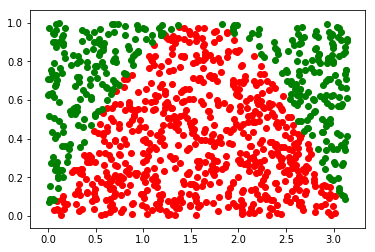

In [90]:
def integrate(num_samples=int(1e2), isPlot=False):
    xList = []
    yList = []
    yBelow = []
    yAbove = []
    xBelow = []
    xAbove = []
    aboveCurve = 0
    belowCurve = 0
    
    for i in range(num_samples):
        x = np.random.uniform(low = 0, high = np.math.pi)
        y = np.random.uniform(low = 0, high = 1)
        xList.append(x)
        yList.append(y)
        
        #Check if the random Y is below the curve or above, append acordingly
        if(y < np.sin(x)):
            belowCurve = belowCurve + 1
            yBelow.append(y)
            xBelow.append(x)
        else:
            aboveCurve = aboveCurve + 1
            yAbove.append(y)
            xAbove.append(x)
    #Plots the points with colors        
    if(isPlot):  
        plt.scatter(xBelow, yBelow, color = 'r')
        plt.scatter(xAbove, yAbove, color = 'g')
        plt.show
        return
    else:
        estimate = belowCurve / aboveCurve
        sample_var =  np.var(yList)
        return estimate, sample_var 
    
integrate(1000, True)
integrate(10000, False)

With an estimate of around 1.75 I would say that it is fairly close to our exact value from part A and the graph shows it following a sin curve.

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

### [25 points] Problem 2 - Sampling Freshies
***

Ralphie the buffalo stands alone in a field. Snow has come to Colorado and flakes collect on her majestic horns and beard. She shivers them off not because she is cold but just because her buffalo reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her barn-mansion, hungry. There is hay from the autumn harvest. This is no ordinary hay, of course. It must be inspected with statistical care so that it is with high probability of the finest quality. You see, Ralphie's hay has a freshness score, measured in Freshies, named after Hayward Freshmann. The average piece of hay from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the hay. Your boss, Governor John Hickenlooper, tells you that you must take a sample of hay and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the bale of hay must be thrown away, rejected. The current system, when you arrive is to sample 30 pieces of hay from each bale to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



I feel this question is too hard and should count as extra credit. I've put roughly 2.5 - 3 hours into this question alone.

**Part B**: What is the probability that a bale of hay is rejected under the current system of 30 samples?

We want: P( Freshies < 90 ) = 1 - P(Freshies > 90)  

$\sqrt{\frac{6^2}{30}}$ = $\sqrt{\sigma^2}$  

$\sigma = \frac{6}{\sqrt{30}}$    

Standardize:  z = $\frac{90 - 91}{\sigma} = -0.9129$  

$P(Freshies < 90) = \Phi(z) = .18141$ (Using a standard normal table)  

Meaning there is a 18.14% chance that the bale of hay is rejected.

**Part C**: Well, that's not good enough. Not for our Ralphie. You propose to Governor Hickelooper that you will get hay from a new supplier. The new supplier's hay has a standard deviation of 6 Freshies, just like the old one. But, they can harvest the hay from various parts of the field, to adjust the average Freshy level of the hay, $\mu$. Gov. Hickenlooper's requirement is that the probability that a bale of hay is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


We want: $\Phi(z) <= 0.001$  

$\Phi(z) <= 0.001$ if z = -3.09

$-3.09 = \frac{90-\mu}{\sigma}$  

$\frac{6}{\sqrt{30}} * -3.09 = 90 - \mu$  

$\mu = 93.38$  

So the minimum Freshie level to meet the Governor's standards is 93.38 or 94 rounded up.

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old hay. But the Governor's requirement still stands: the probability that a bale of hay is rejected must be less than 0.001. You decide you'll just take more samples from the existing bales of hay. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each bale of hay is rejected with probability less than $0.001$?


looking for x: $\mu = \frac{6}{\sqrt{x}}$  

We need: $-3.09 = \frac{90 - 91}{\mu}$  

$\frac{6}{\sqrt{x}} = \frac{-1}{-3.09}$  

$\sqrt{x} = 6 * 3.09$  

x = 343.73  

Therefore the minimum number of hay bales to sample in order to meet the Governor's standards is 344 bales.

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Ralphie. 

 


### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a [simplified version of Plinko](https://github.com/chrisketelsen/csci3022/blob/master/inclass-notebooks/lecture11solutions.ipynb):  

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

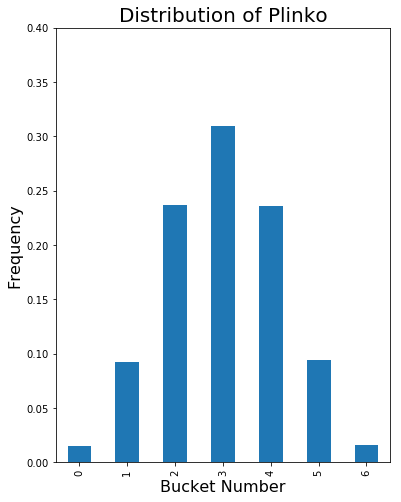

In [3]:
numTrials = 10000
rows = 6
p = 0.5
buckets = [0,0,0,0,0,0,0] 
for i in range(numTrials):   
    #Start from the middle of the board
    puck = 3    
    #move randomly left or right 
    for j in range(rows):        
        puck = puck + np.random.choice([-0.5,0.5], p = [1-p, p])    
    #Check the bucket it landed in
    if(puck == 0):        
        buckets[0] = buckets[0] + 1    
    elif(puck == 1):       
        buckets[1] = buckets[1] + 1   
    elif(puck == 2):       
        buckets[2] = buckets[2] + 1   
    elif(puck == 3):        
        buckets[3] = buckets[3] + 1    
    elif(puck == 4):        
        buckets[4] = buckets[4] + 1    
    elif(puck == 5):        
        buckets[5] = buckets[5] + 1     
    elif(puck == 6):        
        buckets[6] = buckets[6] + 1

#Compute the prob for each bucket
for i in range(7):    
    buckets[i] = buckets[i]/numTrials
    
fig,ax = plt.subplots(nrows = 1, ncols =1, figsize = (6,8))
ax.grid(alpha = 0.25)
ax.set_axisbelow(True)
plt.xticks(np.arange(1,7,1))
pd.Series(buckets).plot(kind = "bar",ax=ax)

ax.set_ylim([0,.4])
ax.set_title("Distribution of Plinko", fontsize = 20)
ax.set_xlabel("Bucket Number", fontsize = 16)
ax.set_ylabel("Frequency", fontsize = 16)

The graph shows that you are much more likely to land in a bucket towards the center than a bucket on the outside of the board.

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

Finding the PMF:for bucket 0 one must take six lefts and there is only one way to six choose six  

for bucket 1, one must have five lefts and one right and order does not matter so six choose one equals $\frac{6!}{(6-1)!*1!} = \frac{720}{120} = 6$  

for bucket 2, one must take four lefts and two rights and order doesn't matter. So, six choose two equals $\frac{6!}{(6-2)!2!} = \frac{720}{48} = 15$  

for bucket 3, one must take three lefts and three rights order is not a worry for us. six choose three equals $\frac{6!}{(6-3)!3!} = \frac{720}{36} = 20.$  

for bucket 4, one must take two lefts and four rights. Don't ask about the order. It doesn't matter. Six choose four equals $\frac{6!}{(6-4)!4!} = \frac{720}{48} = 15$  

for bucket 5, one has to take five lefts and one right. Six choose five equals $\frac{6!}{(6-5)!5!} = \frac{720}{120} = 6$  

for bucket 6, one has to take only rights so six choose six is equal to one.  

and the total possible moves are the sum of all the possible outcomes that lead to a certain bucket so total = 1+6+15+20+15+6+1 = 64  

so the PMF for X  =  $P(X = 0) = \frac{1}{64}$$P(X = 1) = \frac{6}{64}$$P(X = 2) = \frac{15}{64}$$P(X = 3) = \frac{20}{64}$$P(X = 4) = \frac{15}{64}$$P(X = 5) = \frac{6}{64}$$P(X = 6) = \frac{1}{64}$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [8]:
#Essentially the same as above except added handling of bounds
def plinko_Bound(left_bound, right_bound, n):
    numTrials = n
    p = 0.5
    rows = 6
    buckets = [0, 0, 0, 0, 0, 0, 0]
    for i in range(numTrials):
        puck = 3
        for j in range(rows):
            puck = puck + np.random.choice([-0.5, 0.5], p = [1 - p, p])
            #Forces puck to go left or right if hits the bound
            if(puck == right_bound):
                puck = puck - 0.5
                j = j + 1
            elif(puck == left_bound):
                puck = puck + 0.5
                j = j + 1
                
        if(puck == 0):        
            buckets[0] = buckets[0] + 1    
        elif(puck == 1):       
            buckets[1] = buckets[1] + 1 
        elif(puck == 1.5):
            puck = int(puck + np.random.choice([-0.5, 0.5], p = [1 - p, p]))
            buckets[puck] = buckets[puck] + 1 
        elif(puck == 2):       
            buckets[2] = buckets[2] + 1   
        elif(puck == 2.5):
            puck = int(puck + np.random.choice([-0.5, 0.5], p = [1 - p, p]))
            buckets[puck] = buckets[puck] + 1 
        elif(puck == 3):        
            buckets[3] = buckets[3] + 1    
        elif(puck == 3.5):
            puck = int(puck + np.random.choice([-0.5, 0.5], p = [1 - p, p]))
            buckets[puck] = buckets[puck] + 1 
        elif(puck == 4):        
            buckets[4] = buckets[4] + 1    
        elif(puck == 4.5):
            puck = int(puck + np.random.choice([-0.5, 0.5], p = [1 - p, p]))
            buckets[puck] = buckets[puck] + 1 
        elif(puck == 5):        
            buckets[5] = buckets[5] + 1    
        elif(puck == 5.5):
            puck = int(puck + np.random.choice([-0.5, 0.5], p = [1 - p, p]))
            buckets[puck] = buckets[puck] + 1 
        elif(puck == 6):        
            buckets[6] = buckets[6] + 1
        else:
            print(puck)
            
    for i in range(7):    
        buckets[i] = buckets[i]/numTrials
        
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,8))
    ax.grid(alpha = 0.25)
    ax.set_axisbelow(True)
    plt.xticks(range(0, 7))
    pd.Series(buckets).plot(kind = "bar",ax=ax, edgecolor="white")
    
    ax.set_ylim([0,.4])
    ax.set_title("Distribution of Plinko With Bounds", fontsize = 20)
    ax.set_xlabel("Bucket Number", fontsize = 16)
    ax.set_ylabel("Frequency", fontsize = 16)

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




1.0


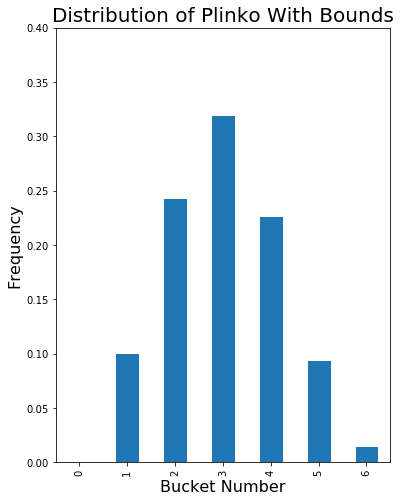

In [5]:
plinko_Bound(0.5, 7, 10000)

The graph shows that no pucks landed in the 0 bucket, as it should since the pucks will be pushed towards the center if they reach the 0 bucket. It also has the data shifted to the right more, meaning bucket 1 is more likely because the pucks are pushed to the right.

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


1.0


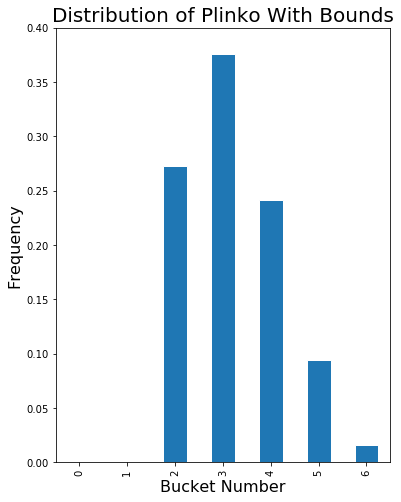

In [6]:
plinko_Bound(1.5, 7, 10000)

Again, the pucks are being pushed to the right because of the bounds, making the buckets 2/3 much more likely to be chosen.

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/figs/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




0.0
0.0
0.2858
0.3646
0.2476
0.102
0.0


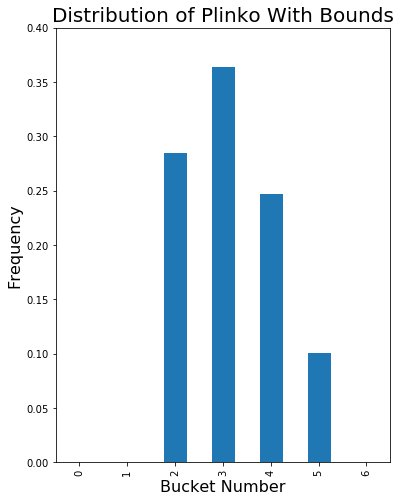

In [9]:
plinko_Bound(1.5, 5.5, 10000)

Now that there is a bound on either side, the buckets in the middle are even more likely, specifically bucket 3. All the buckets in the middle are now much more likely to be chosen because they are in the middle of the bounds.

**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

Calculate the probability of each bucket:  

2) 10,000 x .2858 = 2858  
3) 10,000 x .3646 = 3646  
4) 10,000 x .2476 = 2476   
5) 10,000 x .102 = 1020  

Calculate the winnings:  

2858 x 2 = 5716   
3646 x 3 = 10938  
2476 x 4 = 9904  
1020 x 5 = 5100  

Summing these numbers gives 31658 and after 10,000 trials: 31658/10000 = 3.167  
Meaning to break even after 10,000 games you would have to charge $3.18 per turn.

### Challenge Problem - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
